In [9]:
using CSV, DataFrames, Dates
using Plots, StatsPlots

In [2]:
include("./src/cubes.jl")
include("./src/network.jl")
include("./src/motifs_discovery.jl")
include("./src/motifs_analysis.jl")

volume_tetrahedrons (generic function with 1 method)

## Read Data

In [3]:
path = "./data/"
name = "italy"
filepath = path * name * ".csv"

italy_full = CSV.read(filepath, DataFrame);

# italy = italy_full[(italy_full.Depth .>= 0.0),:];

417940×7 DataFrame
    Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Typ ⋯
        │ DateTime                 Float64   Float64    Float64  String7       ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 1985-01-02T18:39:30.740   48.092      7.061      10.0  M             ⋯
      2 │ 1985-01-02T22:57:43.090   41.715     13.941       5.8  Md
      3 │ 1985-01-03T00:46:16.990   41.677     13.931       6.1  Md
      4 │ 1985-01-04T16:57:40.240   46.158      7.174      10.0  M
      5 │ 1985-01-04T23:59:54.820   45.338      6.641       5.0  M             ⋯
      6 │ 1985-01-05T03:47:03.640   45.409      6.627      10.0  M
      7 │ 1985-01-05T08:32:41.900   43.056     13.139       2.8  Md
      8 │ 1985-01-05T10:13:26.800   45.15       7.86       20.8  Md
   ⋮    │            ⋮                ⋮          ⋮         ⋮           ⋮       ⋱
 417934 │ 2023-02-19T07:01:51.200   43.3207    12.7393      8.6  ML            ⋯
 417935 │ 2023-02-19T07:48:04.970   42.6252    13.2232     14.1  ML
 417936 │ 2023-02-19T07:48:22.300   42.633     13.2292     14.4  ML
 417937 │ 2023-02-19T08:04:04.190   42.8087    13.1017      9.0  ML
 417938 │ 2023-02-19T08:18:35.630   41.7312    13.6947      8.3  ML            ⋯
 417939 │ 2023-02-19T08:38:36.500   43.9582    13.3612     26.9  ML
 417940 │ 2023-02-19T09:28:55.200   34.6667    14.3617     38.7  ML
                                               3 columns and 417925 rows omitted

In [6]:
select!(italy_full, Not(:Event_Type))

417940×6 DataFrame
    Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Typ ⋯
        │ DateTime                 Float64   Float64    Float64  String7       ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 1985-01-02T18:39:30.740   48.092      7.061      10.0  M             ⋯
      2 │ 1985-01-02T22:57:43.090   41.715     13.941       5.8  Md
      3 │ 1985-01-03T00:46:16.990   41.677     13.931       6.1  Md
      4 │ 1985-01-04T16:57:40.240   46.158      7.174      10.0  M
      5 │ 1985-01-04T23:59:54.820   45.338      6.641       5.0  M             ⋯
      6 │ 1985-01-05T03:47:03.640   45.409      6.627      10.0  M
      7 │ 1985-01-05T08:32:41.900   43.056     13.139       2.8  Md
      8 │ 1985-01-05T10:13:26.800   45.15       7.86       20.8  Md
   ⋮    │            ⋮                ⋮          ⋮         ⋮           ⋮       ⋱
 417934 │ 2023-02-19T07:01:51.200   43.3207    12.7393      8.6  ML            ⋯
 417935 │ 2023-02-19T07:48:04.970   42.6252    13.2232     14.1  ML
 417936 │ 2023-02-19T07:48:22.300   42.633     13.2292     14.4  ML
 417937 │ 2023-02-19T08:04:04.190   42.8087    13.1017      9.0  ML
 417938 │ 2023-02-19T08:18:35.630   41.7312    13.6947      8.3  ML            ⋯
 417939 │ 2023-02-19T08:38:36.500   43.9582    13.3612     26.9  ML
 417940 │ 2023-02-19T09:28:55.200   34.6667    14.3617     38.7  ML
                                               2 columns and 417925 rows omitted

In [5]:
italy_full[(italy_full.Depth .< 0.0),:]

1×7 DataFrame
 Row │ Datetime             Latitude  Longitude  Depth    Magnitude_Type  Magn ⋯
     │ DateTime             Float64   Float64    Float64  String7         Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2018-12-26T02:19:14    37.644     15.116     -0.3  Mw                   ⋯
                                                               2 columns omitted

In [7]:
combine(groupby(italy_full, [:Magnitude_Type]), nrow => :count)

9×2 DataFrame
 Row │ Magnitude_Type  count  
     │ String7         Int64  
─────┼────────────────────────
   1 │ M                 3687
   2 │ Md               61552
   3 │ ML              348784
   4 │ mb                1313
   5 │ Mw                1399
   6 │ Mb                   1
   7 │ Ms                   1
   8 │ Mwp               1149
   9 │ Mwpd                54

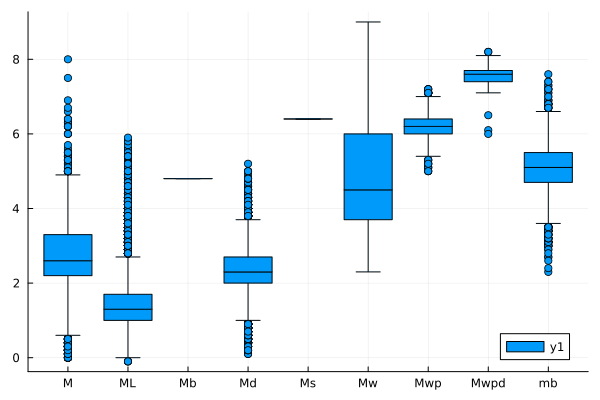

In [10]:
@df italy_full boxplot(:Magnitude_Type, :Magnitude)

In [22]:
italy_full

417940×7 DataFrame
    Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Typ ⋯
        │ DateTime                 Float64   Float64    Float64  String7       ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 1985-01-02T18:39:30.740   48.092      7.061      10.0  M             ⋯
      2 │ 1985-01-02T22:57:43.090   41.715     13.941       5.8  Md
      3 │ 1985-01-03T00:46:16.990   41.677     13.931       6.1  Md
      4 │ 1985-01-04T16:57:40.240   46.158      7.174      10.0  M
      5 │ 1985-01-04T23:59:54.820   45.338      6.641       5.0  M             ⋯
      6 │ 1985-01-05T03:47:03.640   45.409      6.627      10.0  M
      7 │ 1985-01-05T08:32:41.900   43.056     13.139       2.8  Md
      8 │ 1985-01-05T10:13:26.800   45.15       7.86       20.8  Md
   ⋮    │            ⋮                ⋮          ⋮         ⋮           ⋮       ⋱
 417934 │ 2023-02-19T07:01:51.200   43.3207    12.7393      8.6  ML            ⋯
 417935 │ 2023-02-19T07:48:04.970   42.6252    13.2232     14.1  ML
 417936 │ 2023-02-19T07:48:22.300   42.633     13.2292     14.4  ML
 417937 │ 2023-02-19T08:04:04.190   42.8087    13.1017      9.0  ML
 417938 │ 2023-02-19T08:18:35.630   41.7312    13.6947      8.3  ML            ⋯
 417939 │ 2023-02-19T08:38:36.500   43.9582    13.3612     26.9  ML
 417940 │ 2023-02-19T09:28:55.200   34.6667    14.3617     38.7  ML
                                               3 columns and 417925 rows omitted

In [27]:
italy_full[:, :year] = year.(italy_full.Datetime)
quakes_per_year = combine(groupby(italy_full, [:year]), nrow => :count);

UndefVarError: UndefVarError: italy_years not defined

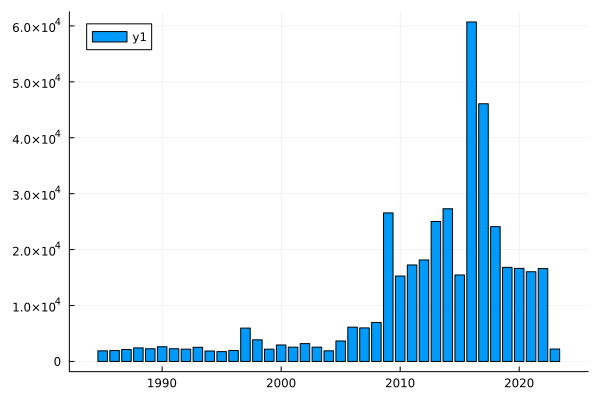

In [31]:
bar(quakes_per_year.year, quakes_per_year.count)

In [58]:
italy_full_mag1

96757×7 DataFrame
   Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Type ⋯
       │ DateTime                 Float64   Float64    Float64  String7        ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 2005-04-16T00:16:02.640   41.677     14.189       8.6  ML             ⋯
     2 │ 2005-04-17T05:21:37.780   43.96      11.574       8.4  ML
     3 │ 2005-04-18T18:39:15.030   41.644     14.163       4.7  ML
     4 │ 2005-04-18T22:19:14.100   41.671     14.194       4.8  ML
     5 │ 2005-04-18T23:21:16.460   41.643     14.159       4.7  ML             ⋯
     6 │ 2005-04-19T00:03:57.240   41.654     14.17        6.3  ML
     7 │ 2005-04-19T18:19:57.860   41.719     14.188      11.6  ML
     8 │ 2005-04-19T20:27:54.590   41.674     14.193       7.4  ML
   ⋮   │            ⋮                ⋮          ⋮         ⋮           ⋮        ⋱
 96751 │ 2023-02-18T18:34:55.620   41.7402    13.6968      8.2  ML             ⋯
 96752 │ 2023-02-18T21:14:04.520   44.3257    10.9977     20.8  ML
 96753 │ 2023-02-18T22:23:06.150   42.9128    12.9807     10.8  ML
 96754 │ 2023-02-18T23:54:18.890   43.3137    12.2055      9.1  ML
 96755 │ 2023-02-19T02:02:56.230   43.1015    12.9057     10.0  ML             ⋯
 96756 │ 2023-02-19T04:12:37.370   43.4545    12.7522     14.3  ML
 96757 │ 2023-02-19T08:18:35.630   41.7312    13.6947      8.3  ML
                                                2 columns and 96742 rows omitted

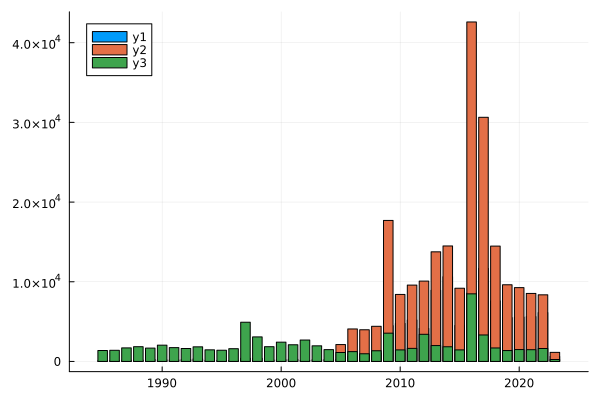

In [57]:
italy_full_mag1 = italy_full[(italy_full.Magnitude .<= 1.0),:];
quakes_per_year_mag1 = combine(groupby(italy_full_mag1, [:year]), nrow => :count);

italy_full_mag2 = italy_full[(italy_full.Magnitude .> 1.0) .& (italy_full.Magnitude .<= 2.0) ,:];
quakes_per_year_mag2 = combine(groupby(italy_full_mag2, [:year]), nrow => :count);

italy_full_mag3 = italy_full[(italy_full.Magnitude .> 2.0) .& (italy_full.Magnitude .<= 3.0),:];
quakes_per_year_mag3 = combine(groupby(italy_full_mag3, [:year]), nrow => :count);


bar(quakes_per_year_mag1.year, quakes_per_year_mag1.count)
bar!(quakes_per_year_mag2.year, quakes_per_year_mag2.count)
bar!(quakes_per_year_mag3.year, quakes_per_year_mag3.count)


In [62]:
groupedbar([quakes_per_year_mag1.count quakes_per_year_mag2.count quakes_per_year_mag3.count],
            bar_position = :stack,
            bar_width=0.7,
            xticks=(1:12, ticklabel),
            label=["1" "2" "3"]) 

DimensionMismatch: DimensionMismatch: vectors must have same lengths

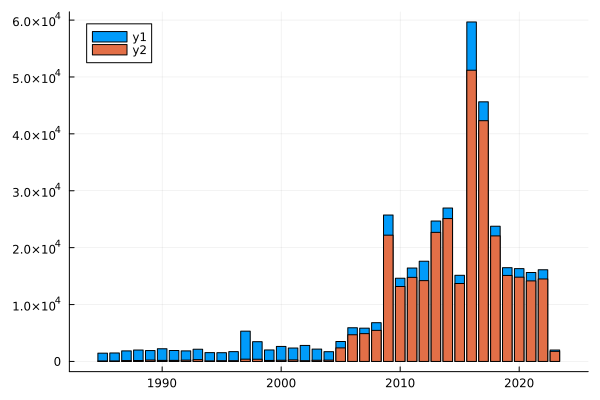

In [53]:
bar(quakes_per_year_mag3.year, quakes_per_year_mag3.count)
bar!(quakes_per_year_mag2.year, quakes_per_year_mag2.count)

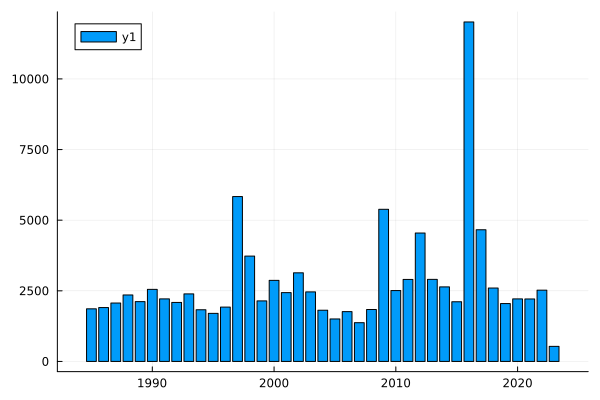

In [63]:
italy_full_mag1

96757×7 DataFrame
   Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Type ⋯
       │ DateTime                 Float64   Float64    Float64  String7        ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 2005-04-16T00:16:02.640   41.677     14.189       8.6  ML             ⋯
     2 │ 2005-04-17T05:21:37.780   43.96      11.574       8.4  ML
     3 │ 2005-04-18T18:39:15.030   41.644     14.163       4.7  ML
     4 │ 2005-04-18T22:19:14.100   41.671     14.194       4.8  ML
     5 │ 2005-04-18T23:21:16.460   41.643     14.159       4.7  ML             ⋯
     6 │ 2005-04-19T00:03:57.240   41.654     14.17        6.3  ML
     7 │ 2005-04-19T18:19:57.860   41.719     14.188      11.6  ML
     8 │ 2005-04-19T20:27:54.590   41.674     14.193       7.4  ML
   ⋮   │            ⋮                ⋮          ⋮         ⋮           ⋮        ⋱
 96751 │ 2023-02-18T18:34:55.620   41.7402    13.6968      8.2  ML             ⋯
 96752 │ 2023-02-18T21:14:04.520   44.3257    10.9977     20.8  ML
 96753 │ 2023-02-18T22:23:06.150   42.9128    12.9807     10.8  ML
 96754 │ 2023-02-18T23:54:18.890   43.3137    12.2055      9.1  ML
 96755 │ 2023-02-19T02:02:56.230   43.1015    12.9057     10.0  ML             ⋯
 96756 │ 2023-02-19T04:12:37.370   43.4545    12.7522     14.3  ML
 96757 │ 2023-02-19T08:18:35.630   41.7312    13.6947      8.3  ML
                                                2 columns and 96742 rows omitted

## Create Cubes

In [ ]:
italy, italy_cubes = region_cube_split(italy,side=10,energyRelease=false);

MG = create_network(italy, italy_cubes; edgeWeight=false)
connectivity = degree(MG);

In [108]:
using DataStructures

In [109]:
c = DataStructures.counter(fit_data)

Accumulator{Int64, Int64} with 184 entries:
  56  => 8
  35  => 25
  60  => 10
  220 => 2
  67  => 4
  215 => 2
  73  => 4
  185 => 2
  86  => 5
  224 => 1
  12  => 236
  75  => 3
  23  => 54
  111 => 1
  41  => 10
  68  => 3
  82  => 1
  130 => 1
  125 => 2
  ⋮   => ⋮

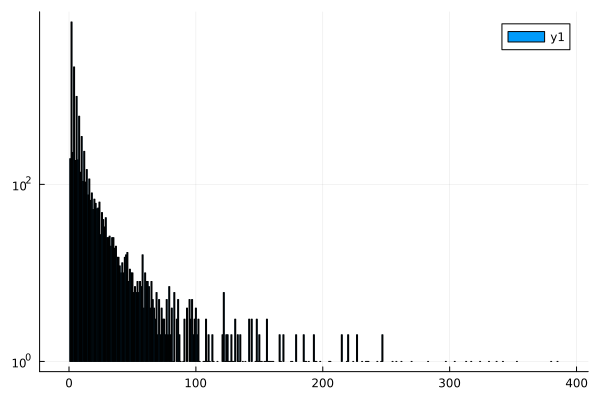

In [112]:
bar(collect(keys(c)), collect(values(c)),yscale=:log10)

In [123]:
using PyCall

In [124]:
powerlaw = pyimport("powerlaw")

PyObject <module 'powerlaw' from 'C:\\Users\\gabipana\\.julia\\conda\\3\\lib\\site-packages\\powerlaw.py'>

In [125]:
py"""
import powerlaw as powerlaw
def fit_data_powerlaw(fit_data):
    results = powerlaw.Fit(fit_data)
    alpha = results.power_law.alpha
    xmin = results.power_law.xmin
    print(results.power_law.alpha)
    print(results.power_law.xmin)
    R, p = results.distribution_compare('power_law', 'lognormal')
    return alpha, xmin

def plot_pdf(fit_data):
    pdf = powerlaw.pdf(fit_data)
    return pdf
"""

In [126]:
alpha, xmin = py"fit_data_powerlaw"(fit_data)

Calculating best minimal value for power law fit
C:\Users\gabipana\.julia\conda\3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


(2.4074289949031984, 20.0)

In [127]:
pdf = py"plot_pdf"(fit_data)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 17.0  …  45.0, 57.0, 72.0, 92.0, 117.0, 148.0, 188.0, 239.0, 303.0, 385.0], [0.013962480309322641, 0.4884720034369182, 0.016396964055563512, 0.15179722182443076, 0.013318058141200058, 0.04203064585421738, 0.025955892882715166, 0.016492434006396488, 0.007947873406845196, 0.00468280108835744  …  0.001102677932120865, 0.0006742565277578882, 0.00046302926153993034, 0.00020048689674924817, 0.00012602033509952743, 8.546100437467952e-5, 5.549190892166691e-5, 2.807939730381627e-5, 1.1187884863239296e-5, 8.732007698137987e-6])

In [128]:
function power_law(x,a)
    return x .^(-a)
end

power_law (generic function with 2 methods)

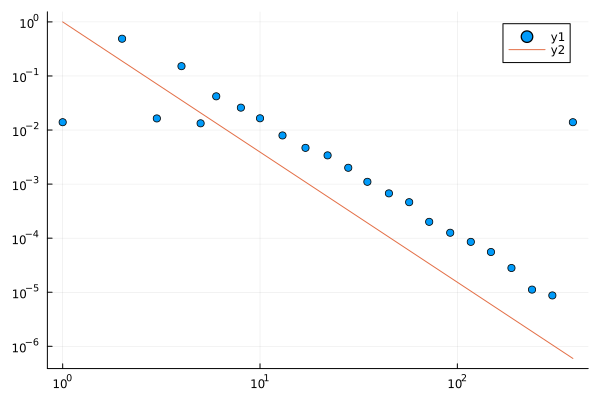

In [129]:
scatter(pdf,xscale=:log10, yscale=:log10)
#plot!(pdf[1],power_law(pdf[1],alpha))
plot!(fit_data,power_law(fit_data,alpha))

In [130]:
# pdf[1]
# findfirst(item -> item >= xmin, pdf[1])
# pdf_cutoff = pdf[1][findfirst(item -> item >= xmin, pdf[1]) : end]
# scatter(pdf,xscale=:log10, yscale=:log10)
# plot!(pdf_cutoff,power_law(pdf_cutoff,alpha))

In [113]:
include("./src/histogram_fit.jl")

power_law (generic function with 2 methods)

In [114]:
h, x,y = histogram_fit(fit_data)

(Histogram{Float64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:0.33219975495191384:384.6907169694605
weights: [195.0, 0.0, 0.0, 6822.0, 0.0, 0.0, 229.0, 0.0, 0.0, 2120.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
closed: left
isdensity: false, Any[1.1660998774759568], [1.0])

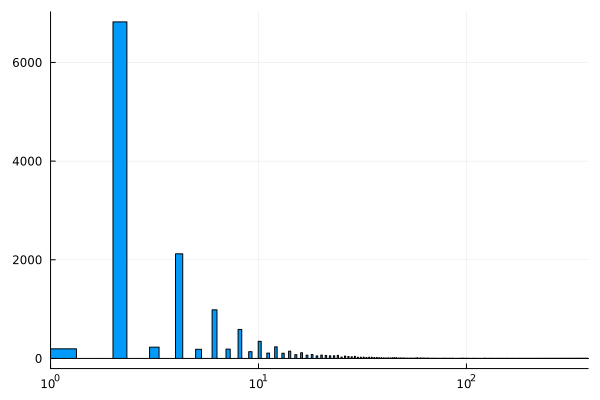

In [115]:
plot(h ; label="",xscale=:log10, xlim=extrema(fit_data))

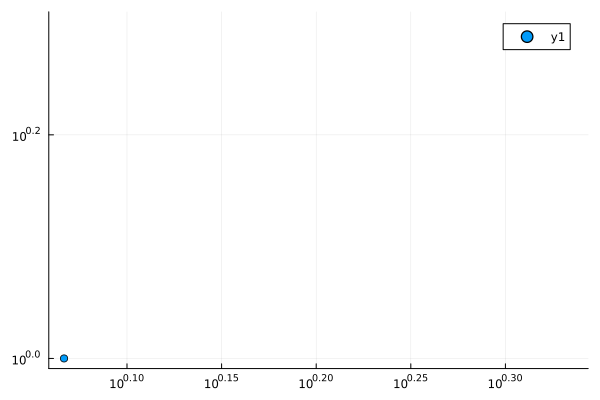

In [116]:
scatter(x,y,xscale=:log10,yscale=:log10)

In [117]:
# bstep = 2 * iqr(fit_data) * length(fit_data) ^ (-1/3)
# b = minimum(fit_data) : bstep : maximum(fit_data)
h = StatsBase.fit(Histogram{Float64}, fit_data, nbins=ceil(sqrt(length(fit_data))))


# Collect bin edges and calculate middle between each 2 points
xx = collect(h.edges[1])
x=[]
for i in eachindex(xx[1:end-1])
    push!(x,(xx[i]+xx[i+1])/2)
end
# Results x, the middle of each bin

# Collect bin weights (number of counts in each bin)
y = h.weights

# Code for stoping at first zero (apply to both vectors)
y_nozero=[]
x_nozero=[]
for i in eachindex(y)
    if y[i] == 0.0
        y_nozero = y[2:i-1]
        x_nozero = x[2:i-1]
        break
    end
end

# Normalize the bin weights (so they add up to 1)
y_nozero_norm = LinearAlgebra.normalize(y_nozero);

x = x_nozero
y = y_nozero_norm;

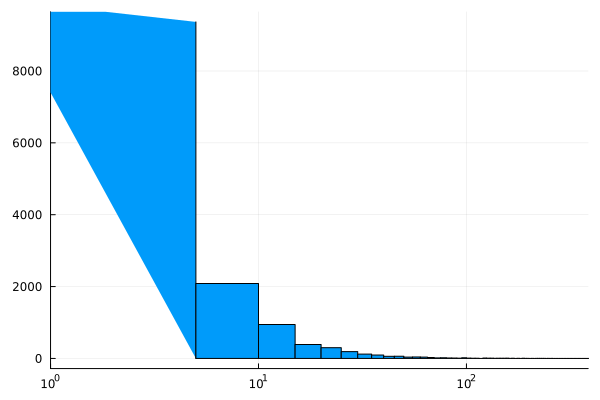

In [118]:
plot(h ; label="",xscale=:log10, xlim=extrema(fit_data))

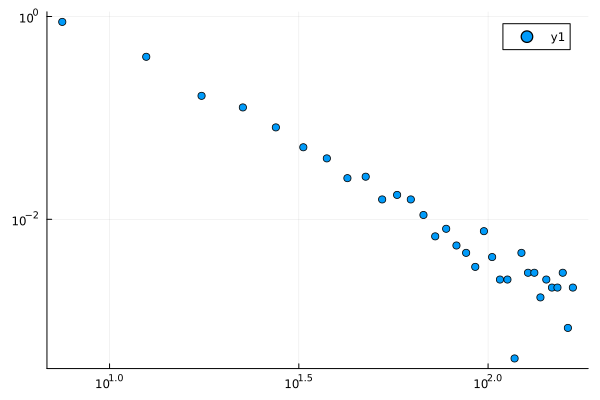

In [119]:
scatter(x,y,xscale=:log10,yscale=:log10)

In [120]:
using CurveFit

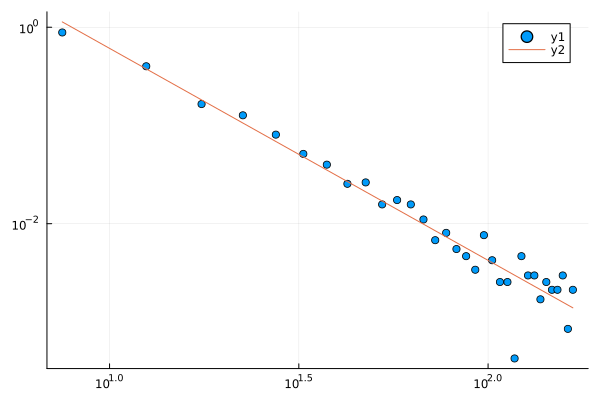

In [121]:
parameters = CurveFit.power_fit(x, y)

scatter(x, y,xscale=:log10,yscale=:log10)
plot!(x,power_law(x,parameters[1],parameters[2]))

In [122]:
parameters

(87.69490275464604, -2.158227084112328)